# IMPORT LIBRARIES

In [1]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import scikitplot as skplt
import soundfile as sf
from soundfile import SoundFile
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.fft import fft, fftfreq, rfftfreq, rfft
import math
import antropy as ant
import seaborn as sns
from scipy.stats import norm, kurtosis
from pedalboard import LadderFilter, Pedalboard
#plt.style.use('dark_background')

# LOAD INSTRUMENTS

### NUMERO DE SAMPLES POR INSTRUMENTO

In [2]:
numSounds = 50

### SOUND PATHS

In [3]:
kicksPath = "../InstrumentsClassifier/Instruments/Kicks/"
snarePath = "../InstrumentsClassifier/Instruments/Snares/"
hihatPath = "../InstrumentsClassifier/Instruments/HiHats/"
guitarPath = "../InstrumentsClassifier/Instruments/Guitars/"
bassPath = "../InstrumentsClassifier/Instruments/Basses/"
voxPath = "../InstrumentsClassifier/Instruments/Voxes/"

kicks = []
snares = []
hihats = []
guitars = []
basses = []
voxes = []

### LOAD KICKS

In [4]:
# OBTAIN KICKS AUDIO SAMPLES
for i in range(numSounds):
    path = kicksPath + "Kick_" + str(i+1) + ".wav"
    audio = SoundFile(path)

    if audio.channels == 1:
        sound, sr = sf.read(path)
        kicks.append([sound, sr])
    else:
        sound, sr = sf.read(path)
        kicks.append([sound[:,0], sr])

### LOAD SNARES

In [5]:
# OBTAIN SNARE AUDIO SAMPLES
for i in range(numSounds):
    path = snarePath + "Snare_" + str(i+1) + ".wav"
    audio = SoundFile(path)

    if audio.channels == 1:
        sound, sr = sf.read(path)
        snares.append([sound, sr])
    else:
        sound, sr = sf.read(path)
        snares.append([sound[:,0], sr])

### LOAD HI HATS

In [6]:
# OBTAIN HIHAT AUDIO SAMPLES
for i in range(numSounds):
    path = hihatPath + "Hihat_" + str(i+1) + ".wav"
    audio = SoundFile(path)

    if audio.channels == 1:
        sound, sr = sf.read(path)
        hihats.append([sound, sr])
    else:
        sound, sr = sf.read(path)
        hihats.append([sound[:,0], sr])

### LOAD GUITARS

In [9]:
# OBTAIN HIHAT AUDIO SAMPLES
for i in range(numSounds):
    path = guitarPath + "Guitar_" + str(i+1) + ".wav"
    audio = SoundFile(path)

    if audio.channels == 1:
        sound, sr = sf.read(path)
        guitars.append([sound, sr])
    else:
        sound, sr = sf.read(path)
        guitars.append([sound[:,0], sr])

### LOAD BASSES

In [10]:
# OBTAIN HIHAT AUDIO SAMPLES
for i in range(numSounds):
    path = bassPath + "Bass_" + str(i+1) + ".wav"
    audio = SoundFile(path)

    if audio.channels == 1:
        sound, sr = sf.read(path)
        basses.append([sound, sr])
    else:
        sound, sr = sf.read(path)
        basses.append([sound[:,0], sr])

### LOAD VOXES

In [12]:
# OBTAIN HIHAT AUDIO SAMPLES
for i in range(numSounds):
    path = voxPath + "Vox_" + str(i+1) + ".wav"
    audio = SoundFile(path)

    if audio.channels == 1:
        sound, sr = sf.read(path)
        voxes.append([sound, sr])
    else:
        sound, sr = sf.read(path)
        voxes.append([sound[:,0], sr])

# SEE AND ANALIZE SOUNDS

### FUNCTIONS TO SEE WAVEFORM, SPECTROGRAM AND FFT

In [13]:
def graph_spectrogram(samples, sr, title):    
    plt.figure(figsize=(10,6))
    plt.specgram(samples)
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
def graph_waveform(samples, sr, title):  
    plt.figure(figsize=(10,6))
    plt.plot(samples)
    plt.title(title)
    plt.ylabel('Linear Amplitude')
    plt.xlabel('Time')
    plt.show()

def graph_spectrum(samples, sr, title):
    N = len(samples)
    T = 1/sr
    yf = fft(samples)
    xf = fftfreq(N, T)[:N//2]
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()
    plt.show()

### PLOT AUDIO IN TIME DOMAIN

### Explicar el comportamiento de las graficas y la naturaleza de los sonidos

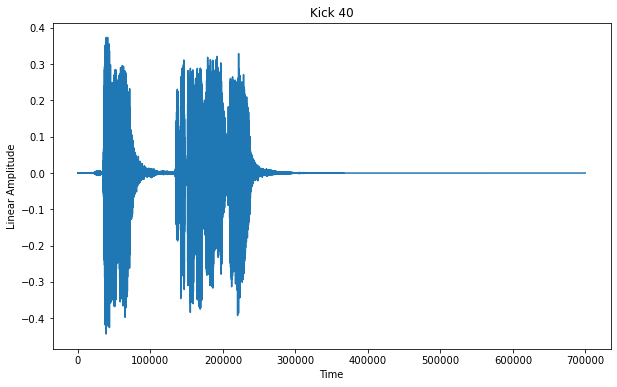

In [18]:
numKick = 40
graph_waveform(voxes[numKick-1][0], voxes[numKick-1][1], "Kick " + str(numKick))

### PLOT AUDIO IN FREQUENCY DOMAIN

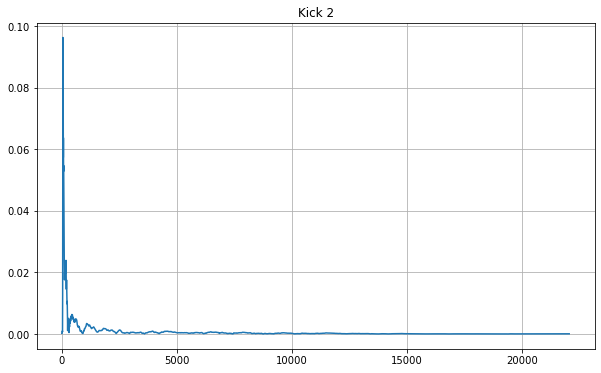

In [19]:
numKick = 2
graph_spectrum(kicks[numKick-1][0], kicks[numKick-1][1], "Kick " + str(numKick))

# PRE PROCESSING

### CALCULATE CENTROID FOR ALL THE SOUNDS

In [11]:
kicks_centroid = []
snares_centroid = []
hihats_centroid = []
guitars_centroid = []

cont = 0
for kick in kicks:
    amplitude = np.abs(rfft(kick[0]))
    frequency = rfftfreq(len(kick[0]), 1 / kick[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    kicks_centroid.append(centroid)

for snare in snares:
    amplitude = np.abs(rfft(snare[0]))
    frequency = rfftfreq(len(snare[0]), 1 / snare[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    snares_centroid.append(centroid)
    
for hihat in hihats:
    amplitude = np.abs(rfft(hihat[0]))
    frequency = rfftfreq(len(hihat[0]), 1 / hihat[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    hihats_centroid.append(centroid)
    
for guitar in guitars:
    amplitude = np.abs(rfft(guitar[0]))
    frequency = rfftfreq(len(guitar[0]), 1 / guitar[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    guitars_centroid.append(centroid)

print("Instrument:", guitars_centroid)

Instrument: [2067.2182953615797, 971.7122630706654, 2175.9900361749524, 2298.647100280113, 4172.693280872488, 4280.405238274479, 4139.058366523015, 1471.0684617760419, 2504.6730508000846, 1745.7493813593755, 1142.0621485060308, 1067.2626537095998, 1313.2291952893781, 1083.9363996257484, 2651.2081965949887, 826.6719202260253, 1659.8689625729683, 1445.3576830209256, 1717.228177450321, 1526.2105855256464, 1628.5534177248571, 1869.644925474004, 1710.0181728427237, 2035.011242857067, 1619.2141208849941, 2233.700918097664, 2409.8898015462896, 2287.312299414072, 2040.3341879857596, 1883.0356562893526, 1879.2043460383343, 1704.7554495569793, 2319.024120322133, 1475.489274886016, 1556.2998131085824, 1668.7189842856778, 1034.546878915588, 2181.701894820413, 559.2776997002152, 1652.7963169360899, 2053.802702014524, 1546.1243814856139, 5301.225124151047, 1663.4931531905793, 1790.7071569452721, 632.553824496908, 672.7269441297498, 683.6834211150851, 530.3916597972357, 1439.6182851546978]


### CALCULATE SPREAD

In [12]:
kicks_spread = []
snares_spread = []
hihats_spread = []
guitars_spread = []

def spectralSpread(inFrequency, inAmplitude, inCentroid):
    i = 0
    numerator = 0
    denominator = 0
    for frequency in inFrequency:
        numerator += (frequency - inCentroid) ** 2 * inAmplitude[i]
        denominator += inAmplitude[i]
        i += 1
    return math.sqrt(numerator / denominator)

for kick in kicks:
    amplitude = np.abs(rfft(kick[0]))
    frequency = rfftfreq(len(kick[0]), 1 / kick[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    kicks_spread.append(spread)

for snare in snares:
    amplitude = np.abs(rfft(snare[0]))
    frequency = rfftfreq(len(snare[0]), 1 / snare[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    snares_spread.append(spread)
    
for hihat in hihats:
    amplitude = np.abs(rfft(hihat[0]))
    frequency = rfftfreq(len(hihat[0]), 1 / hihat[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    hihats_spread.append(spread)
    
for guitar in guitars:
    amplitude = np.abs(rfft(guitar[0]))
    frequency = rfftfreq(len(guitar[0]), 1 / guitar[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    guitars_spread.append(spread)

print("Instrument:", guitars_spread)

Instrument: [1780.728777136958, 1506.8647626918998, 1771.3548386115965, 1858.6891608211338, 4518.997004538873, 4499.324105932673, 4380.027694194762, 1976.1887316723032, 2646.623155768237, 1578.3467409398438, 1186.039293105764, 1410.93184110435, 1983.2170087493732, 1229.8983139207357, 2040.5078135151493, 1905.4457923332989, 1306.0651195013356, 1696.5918501834972, 1636.3222049248216, 1109.4845256689268, 1135.8001637452373, 1142.3624882341958, 1057.7167675433875, 1416.0833681977822, 1279.4988134139599, 1463.0713411437912, 1231.0959325237197, 1640.09436645708, 1719.8034341307539, 1653.432921170242, 1676.989770421631, 1568.595878521969, 1808.503815235594, 1966.7110320437102, 1536.640189879959, 1856.6533814901165, 1126.1705937691447, 3248.4953013671593, 1905.3130002465, 1981.4540215850484, 1876.8027887050812, 1192.2635517990432, 4959.462420770991, 1519.7945250918297, 2137.874434728721, 930.7658499595899, 820.5416334908748, 850.4944682266226, 774.1671634270086, 1268.5127712417154]


### CALCULATE AND APPLY FILTERS

In [13]:
def highPassProcess(inAudio, inCutoff, inSr):
    board = Pedalboard([LadderFilter(mode=LadderFilter.Mode.HPF12, cutoff_hz=inCutoff)], sample_rate=inSr)
    inAudio = board(inAudio)
    return inAudio

def LowPassProcess(inAudio, inCutoff, inSr):
    board = Pedalboard([LadderFilter(mode=LadderFilter.Mode.LPF12, cutoff_hz=inCutoff)], sample_rate=inSr)
    inAudio = board(inAudio)
    return inAudio

def makeFilters(inSamples, inLow, inHigh):
    inSamples[0] = highPassProcess(inSamples[0], inHigh, inSamples[1])
    inSamples[0] = LowPassProcess(inSamples[0], inLow, inSamples[1])
    return inSamples[0]

cont = 0
for kick in kicks:
    # OBTAIN HIGH AND LOW CUT
    lowCut = kicks_centroid[cont] + kicks_spread[cont]
    highCut = kicks_centroid[cont] - kicks_spread[cont]
    if highCut < 20:
        highCut = 20
    kick[0] = makeFilters(kick, lowCut, highCut)
    cont += 1
    
cont = 0
for snare in snares:
    # OBTAIN HIGH AND LOW CUT
    lowCut = snares_centroid[cont] + snares_spread[cont]
    highCut = snares_centroid[cont] - snares_spread[cont]
    if highCut < 20:
        highCut = 20
    snare[0] = makeFilters(snare, lowCut, highCut)
    cont += 1

cont = 0
for hihat in hihats:
    # OBTAIN HIGH AND LOW CUT
    lowCut = hihats_centroid[cont] + hihats_spread[cont]
    highCut = hihats_centroid[cont] - hihats_spread[cont]
    if highCut < 20:
        highCut = 20
    hihat[0] = makeFilters(hihat, lowCut, highCut)
    cont += 1
    
cont = 0
for guitar in guitars:
    # OBTAIN HIGH AND LOW CUT
    lowCut = guitars_centroid[cont] + guitars_spread[cont]
    highCut = guitars_centroid[cont] - guitars_spread[cont]
    if highCut < 20:
        highCut = 20
    guitar[0] = makeFilters(guitar, lowCut, highCut)
    cont += 1

# OBTAIN DATA

### OBTAIN MAIN CENTROID

In [21]:
kicks_centroid = []
snares_centroid = []
hihats_centroid = []
guitars_centroid = []
basses_centroid = []
voxes_centroid = []

cont = 0
for kick in kicks:
    amplitude = np.abs(rfft(kick[0]))
    frequency = rfftfreq(len(kick[0]), 1 / kick[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    kicks_centroid.append(centroid)

for snare in snares:
    amplitude = np.abs(rfft(snare[0]))
    frequency = rfftfreq(len(snare[0]), 1 / snare[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    snares_centroid.append(centroid)
    
for hihat in hihats:
    amplitude = np.abs(rfft(hihat[0]))
    frequency = rfftfreq(len(hihat[0]), 1 / hihat[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    hihats_centroid.append(centroid)
    
for guitar in guitars:
    amplitude = np.abs(rfft(guitar[0]))
    frequency = rfftfreq(len(guitar[0]), 1 / guitar[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    guitars_centroid.append(centroid)
    
for bass in basses:
    amplitude = np.abs(rfft(bass[0]))
    frequency = rfftfreq(len(bass[0]), 1 / bass[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    basses_centroid.append(centroid)
    
for vox in voxes:
    amplitude = np.abs(rfft(vox[0]))
    frequency = rfftfreq(len(vox[0]), 1 / vox[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    voxes_centroid.append(centroid)

print("Instrument:", voxes_centroid)

Instrument: [5779.599300784658, 6656.488741987098, 4231.83442791353, 5695.834515275709, 5194.8314964620395, 5016.583529528897, 4695.003156779092, 4402.020052541339, 3763.636967067853, 3846.8830573944056, 5654.560952297866, 2816.5435910185543, 3581.8551282370295, 3844.5143699630917, 3371.820351547148, 6115.568765743997, 4944.866838382471, 4913.651698187092, 2186.8721154219215, 2659.555893427724, 2971.281126381291, 3655.2197285471784, 2314.666128263061, 3209.411816321302, 2150.772759151767, 2747.097759728776, 1716.59031632589, 4153.840048121133, 2682.2933318057712, 2544.4496185535904, 2076.576730712515, 3326.113784153125, 2757.002077691148, 1914.416560166712, 5779.599300784658, 6656.488741987098, 4231.83442791353, 5695.834515275709, 5194.8314964620395, 5016.583529528897, 4695.003156779092, 4402.020052541339, 3763.636967067853, 3846.8830573944056, 5654.560952297866, 2816.5435910185543, 3581.8551282370295, 3844.5143699630917, 3371.820351547148, 6115.568765743997, 4944.866838382471, 4913.65

### OBTAIN MAIN SPREAD

In [22]:
kicks_spread = []
snares_spread = []
hihats_spread = []
guitars_spread = []
basses_spread = []
voxes_spread = []

def spectralSpread(inFrequency, inAmplitude, inCentroid):
    i = 0
    numerator = 0
    denominator = 0
    for frequency in inFrequency:
        numerator += (frequency - inCentroid) ** 2 * inAmplitude[i]
        denominator += inAmplitude[i]
        i += 1
    return math.sqrt(numerator / denominator)

for kick in kicks:
    amplitude = np.abs(rfft(kick[0]))
    frequency = rfftfreq(len(kick[0]), 1 / kick[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    kicks_spread.append(spread)

for snare in snares:
    amplitude = np.abs(rfft(snare[0]))
    frequency = rfftfreq(len(snare[0]), 1 / snare[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    snares_spread.append(spread)
    
for hihat in hihats:
    amplitude = np.abs(rfft(hihat[0]))
    frequency = rfftfreq(len(hihat[0]), 1 / hihat[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    hihats_spread.append(spread)
    
for guitar in guitars:
    amplitude = np.abs(rfft(guitar[0]))
    frequency = rfftfreq(len(guitar[0]), 1 / guitar[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    guitars_spread.append(spread)
    
for bass in basses:
    amplitude = np.abs(rfft(bass[0]))
    frequency = rfftfreq(len(bass[0]), 1 / bass[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    basses_spread.append(spread)
    
for vox in voxes:
    amplitude = np.abs(rfft(vox[0]))
    frequency = rfftfreq(len(vox[0]), 1 / vox[1])
    centroid = np.sum(amplitude * frequency) / np.sum(amplitude)
    spread = spectralSpread(frequency, amplitude, centroid)
    voxes_spread.append(spread)

print("Instrument:", voxes_spread)

Instrument: [4318.843395117102, 4088.26940787317, 3970.67309911867, 4235.58310978351, 4414.54481694445, 4400.942149494991, 3690.469163079169, 3827.0150876419307, 3853.606466783096, 3475.3430957287687, 4263.469262778221, 3513.1070884162823, 3727.10490945075, 3926.2085003724133, 3680.189041357268, 5797.988902771831, 4641.930660329971, 5272.552440838065, 2558.946157371996, 3475.950569191138, 3392.807278208631, 3705.5012913715927, 2630.368860290663, 3463.3220634791014, 2266.054537641588, 3154.5793254850146, 1985.9836107344258, 4090.78775355494, 2977.348628710648, 3165.426431384675, 3071.20088192888, 4107.627897178289, 3457.030594712118, 1823.7523378996807, 4318.843395117102, 4088.26940787317, 3970.67309911867, 4235.58310978351, 4414.54481694445, 4400.942149494991, 3690.469163079169, 3827.0150876419307, 3853.606466783096, 3475.3430957287687, 4263.469262778221, 3513.1070884162823, 3727.10490945075, 3926.2085003724133, 3680.189041357268, 5797.988902771831, 4641.930660329971, 5272.552440838065

### OBTAIN MAIN PEAK

In [23]:
kicks_peak = []
snares_peak = []
hihats_peak = []
guitars_peak = []
basses_peak = []
voxes_peak = []

for kick in kicks:
    amplitude = np.abs(rfft(kick[0]))
    frequency = rfftfreq(len(kick[0]), 1 / kick[1])
    peakIndex = np.argmax(np.array(amplitude))
    peak = frequency[peakIndex]
    kicks_peak.append(peak)

for snare in snares:
    amplitude = np.abs(rfft(snare[0]))
    frequency = rfftfreq(len(snare[0]), 1 / snare[1])
    peakIndex = np.argmax(np.array(amplitude))
    peak = frequency[peakIndex]
    snares_peak.append(peak)
    
for hihat in hihats:
    amplitude = np.abs(rfft(hihat[0]))
    frequency = rfftfreq(len(hihat[0]), 1 / hihat[1])
    peakIndex = np.argmax(np.array(amplitude))
    peak = frequency[peakIndex]
    hihats_peak.append(peak)
    
for guitar in guitars:
    amplitude = np.abs(rfft(guitar[0]))
    frequency = rfftfreq(len(guitar[0]), 1 / guitar[1])
    peakIndex = np.argmax(np.array(amplitude))
    peak = frequency[peakIndex]
    guitars_peak.append(peak)
    
for bass in basses:
    amplitude = np.abs(rfft(bass[0]))
    frequency = rfftfreq(len(bass[0]), 1 / bass[1])
    peakIndex = np.argmax(np.array(amplitude))
    peak = frequency[peakIndex]
    basses_peak.append(peak)
    
for vox in voxes:
    amplitude = np.abs(rfft(vox[0]))
    frequency = rfftfreq(len(vox[0]), 1 / vox[1])
    peakIndex = np.argmax(np.array(amplitude))
    peak = frequency[peakIndex]
    voxes_peak.append(peak)
    
print("Instrument:", voxes_peak)

Instrument: [296.19647542342364, 174.31477681301908, 256.9977078248344, 172.67624311918738, 232.7978255774738, 180.61760380925705, 459.92380375322244, 471.01743575379874, 264.18204786701955, 259.7706109990111, 313.212017628599, 190.77763832235124, 348.53227956982744, 277.5329137824433, 1667.064146539461, 241.1969996874674, 258.35352574916413, 225.48589939024393, 1427.0586753966254, 871.3021588221832, 841.9504643962848, 898.6554320544997, 1189.1678702366403, 1316.084397614624, 985.6089467862848, 546.4365081146602, 1241.9146977600492, 705.5957333591331, 447.59332613131676, 401.97281735646084, 102.3566370152863, 690.4882783335822, 448.7712216549923, 890.4794499237734, 296.19647542342364, 174.31477681301908, 256.9977078248344, 172.67624311918738, 232.7978255774738, 180.61760380925705, 459.92380375322244, 471.01743575379874, 264.18204786701955, 259.7706109990111, 313.212017628599, 190.77763832235124, 348.53227956982744, 277.5329137824433, 1667.064146539461, 241.1969996874674, 258.3535257491

### OBTAIN MAIN ZERO CROSSING

In [17]:
kicks_zero_crossing = []
snares_zero_crossing = []
hihats_zero_crossing = []
guitars_zero_crossing = []

cont = 0
for kick in kicks:
    zero_crossing = librosa.feature.zero_crossing_rate(kick[0])
    zero_crossing = zero_crossing.mean() #* kick[1]
    kicks_zero_crossing.append(zero_crossing)
    
for snare in snares:
    zero_crossing = librosa.feature.zero_crossing_rate(snare[0])
    zero_crossing = zero_crossing.mean() #* snare[1]
    snares_zero_crossing.append(zero_crossing)
    
for hihat in hihats:
    zero_crossing = librosa.feature.zero_crossing_rate(hihat[0])
    zero_crossing = zero_crossing.mean() #* hihat[1]
    hihats_zero_crossing.append(zero_crossing)
    
for guitar in guitars:
    zero_crossing = librosa.feature.zero_crossing_rate(guitar[0])
    zero_crossing = zero_crossing.mean() #* hihat[1]
    guitars_zero_crossing.append(zero_crossing)
    
print("Instrument:", guitars_zero_crossing)

Instrument: [0.083080633094584, 0.026386237487166325, 0.09022165055926216, 0.10359687745290423, 0.013856758191747573, 0.02465662802419355, 0.01750584652549342, 0.03774862243357488, 0.06411088708504051, 0.047298750688325994, 0.024452329055642635, 0.021407319343800323, 0.027752066349637682, 0.026989923007246376, 0.10958677254624871, 0.006565661716710183, 0.055082752810686655, 0.0242938962305026, 0.049792534086749635, 0.03088277350249584, 0.028513148211050724, 0.0496189914049236, 0.05016466800567108, 0.0802122219442734, 0.0671090790719697, 0.08133841849662163, 0.05819400326236264, 0.07191850142045454, 0.047880371832450835, 0.053523804330583756, 0.04278885690789474, 0.0403207957125865, 0.09004805177824268, 0.03603886253309797, 0.03667065451235658, 0.049240930599369084, 0.018921267229984894, 0.03640129342900302, 0.008271155886513675, 0.08665135189457494, 0.034142572504020655, 0.06127085584275266, 0.12596097905585107, 0.04182082300844347, 0.03083130923082574, 0.009665952909977064, 0.02242032

### OBTAIN MAIN CURTOSIS 

In [18]:
kicks_kurtosis = []
snares_kurtosis = []
hihats_kurtosis = []
guitars_kurtosis = []

for kick in kicks:
    kurtosisValue = kurtosis(kick[0], fisher=True)
    kicks_kurtosis.append(kurtosisValue)
    
for snare in snares:
    kurtosisValue = kurtosis(snare[0], fisher=True)
    snares_kurtosis.append(kurtosisValue)
    
for hihat in hihats:
    kurtosisValue = kurtosis(hihat[0], fisher=True)
    hihats_kurtosis.append(kurtosisValue)
    
for guitar in guitars:
    kurtosisValue = kurtosis(guitar[0], fisher=True)
    guitars_kurtosis.append(kurtosisValue)
    
print("Instrument:", guitars_kurtosis)

Instrument: [0.2425621601232053, 30.838043700916693, 0.4810334075617573, -0.21894344923417508, 15.917654030801, 12.86093434126334, 12.27176001243246, 4.0014646731081775, 15.39134024733255, -0.22857409202397028, 3.8996229573892407, 1.4859217305643124, 5.204108024692273, 19.002078048509134, 1.1959401616420582, 4.4782987492683555, 3.8188257173933726, 8.302483544334052, 14.165380774363783, 30.903152319762548, 56.037120136511355, 32.195476229095156, 13.920506291646511, 326.5379372453841, 27.71379358246093, 13.074812776017794, 28.036536632413654, 2.9364912346005916, 3.2515437443374413, 2.615675578693576, 1.4521287835234418, -0.37633382697706086, 4.374090679877729, -0.20589597315806651, 4.58082248594696, 0.1989134894928415, 0.06389309904055152, -0.6917253038005438, 2.5519528891208774, 35.28995269654428, 34.62686088318553, 0.5143119921526575, 3.9555370027761025, -0.46984169201415327, 2.236095259839942, 0.23021035205003404, 1.9226771421637636, 2.2649717464773627, -0.43298759676093734, 3.1437514

### OBTAIN MAIN ENTROPY

In [19]:
kicks_entropy = []
snares_entropy = []
hihats_entropy = []
guitars_entropy = []

for kick in kicks:
    entropyValue = ant.spectral_entropy(kick[0], kick[1], method='welch', normalize=True)
    kicks_entropy.append(entropyValue)
    
for snare in snares:
    entropyValue = ant.spectral_entropy(snare[0], snare[1], method='welch', normalize=True)
    snares_entropy.append(entropyValue)
    
for hihat in hihats:
    entropyValue = ant.spectral_entropy(hihat[0], hihat[1], method='welch', normalize=True)
    hihats_entropy.append(entropyValue)

for guitar in guitars:
    entropyValue = ant.spectral_entropy(guitar[0], guitar[1], method='welch', normalize=True)
    guitars_entropy.append(entropyValue)

print("Instrument:", guitars_entropy)

Instrument: [0.6327455276285413, 0.39251607530425947, 0.6404150051015207, 0.6422661832385711, 0.36072639756611796, 0.47460608997759096, 0.4376551284585729, 0.4252227727863635, 0.5764418007479221, 0.41114388260891926, 0.3700568277729614, 0.32259841211422724, 0.45686122915018074, 0.3897458711131307, 0.6214770698603111, 0.23663689902245308, 0.5115783387869907, 0.4467564652543926, 0.5320873508699259, 0.5545162317074368, 0.5117643475384082, 0.5251388868441685, 0.5215088257447505, 0.5249060188497067, 0.5894273879332597, 0.5418698129474444, 0.3922316213361411, 0.5408191525466133, 0.5575340961794748, 0.5817384594537334, 0.4681822930497533, 0.39728922309086195, 0.5850572364378909, 0.41339815905297195, 0.43159641196130527, 0.5161060706395931, 0.3082476499134589, 0.4476458727303203, 0.2303414889394009, 0.371048761096334, 0.5720173768636571, 0.4913590514868848, 0.7467770535089502, 0.40057440288189317, 0.4123667796324066, 0.24331548033237405, 0.3722374488320835, 0.37334431992141426, 0.2631899883398

### OBTAIN MAIN MFCC

In [24]:
kicks_mfcc = []
snares_mfcc = []
hihats_mfcc = []
guitars_mfcc = []
basses_mfcc = []
voxes_mfcc = []

mfcc_bands = 13

for kick in kicks:
    mfccValue = librosa.feature.mfcc(kick[0], sr=kick[1], n_mfcc=mfcc_bands)
    kicks_mfcc.append(mfccValue)
    
for snare in snares:
    mfccValue = librosa.feature.mfcc(snare[0], sr=snare[1], n_mfcc=mfcc_bands)
    snares_mfcc.append(mfccValue)
    
for hihat in hihats:
    mfccValue = librosa.feature.mfcc(hihat[0], sr=hihat[1], n_mfcc=mfcc_bands)
    hihats_mfcc.append(mfccValue)
    
for guitar in guitars:
    mfccValue = librosa.feature.mfcc(guitar[0], sr=guitar[1], n_mfcc=mfcc_bands)
    guitars_mfcc.append(mfccValue)
    
for bass in basses:
    mfccValue = librosa.feature.mfcc(bass[0], sr=bass[1], n_mfcc=mfcc_bands)
    basses_mfcc.append(mfccValue)
    
for vox in voxes:
    mfccValue = librosa.feature.mfcc(vox[0], sr=vox[1], n_mfcc=mfcc_bands)
    voxes_mfcc.append(mfccValue)

### OBTAIN MAIN ROLL OFF

In [21]:
kicks_rollOff = []
snares_rollOff = []
hihats_rollOff = []
guitars_rollOff = []

for kick in kicks:
    rollOffValue = librosa.feature.spectral_rolloff(kick[0], kick[1]).mean()
    kicks_rollOff.append(rollOffValue)

for snare in snares:
    rollOffValue = librosa.feature.spectral_rolloff(snare[0], snare[1]).mean()
    snares_rollOff.append(rollOffValue)
    
for hihat in hihats:
    rollOffValue = librosa.feature.spectral_rolloff(hihat[0], hihat[1]).mean()
    hihats_rollOff.append(rollOffValue)
    
for guitar in guitars:
    rollOffValue = librosa.feature.spectral_rolloff(guitar[0], guitar[1]).mean()
    guitars_rollOff.append(rollOffValue)
    
print("Instrument:", kicks_rollOff)

Instrument: [5319.7265625, 4204.1015625, 5247.94921875, 923.7744140625, 109.78403560450819, 499.5703125, 3057.099609375, 6186.132290274064, 509.5486111111111, 214.55838323353294, 4054.1879226912315, 476.04586693548384, 1417.7613384955753, 2519.384765625, 1741.497802734375, 2117.49047451332, 1610.0210336538462, 2373.651123046875, 907.265625, 2304.3693991268383, 1236.8133544921875, 3874.4009622713415, 4444.677169888006, 5403.837076822917, 2573.5890355603447, 1986.7213199013158, 446.044921875, 478.95063920454544, 805.341796875, 884.296875, 2457.77587890625, 1052.1568561422414, 2767.342862215909, 1506.5266927083333, 870.9614000822369, 2209.1471354166665, 364.62890625, 4516.415700604839, 7446.573153409091, 885.732421875, 2114.6584250710225, 2271.7529296875, 1358.1298828125, 4511.2060546875, 448.9039522058824, 2071.00351068038, 3601.482599431818, 3086.7550351204127, 1237.6697887073863, 396.34552001953125]


### OBTAIN MAIN DECREASE

In [22]:
def getDecrease(inAudio):
    amplitude = np.abs(rfft(inAudio))
    
    primero = amplitude[0]
    amplitude = np.delete(amplitude,0)
    decrease = np.sum(amplitude - primero) / ((len(amplitude)-1) * np.sum(amplitude))
    return decrease

kicks_decrease = []
snares_decrease = []
hihats_decrease = []
guitars_decrease = []

for kick in kicks:
    decreaseValue = getDecrease(kick[0])
    kicks_decrease.append(decreaseValue)

for snare in snares:
    decreaseValue = getDecrease(snare[0])
    snares_decrease.append(decreaseValue)
    
for hihat in hihats:
    decreaseValue = getDecrease(hihat[0])
    hihats_decrease.append(decreaseValue)
    
for guitar in guitars:
    decreaseValue = getDecrease(guitar[0])
    guitars_decrease.append(decreaseValue)

print("Instrument:", hihats_decrease)

Instrument: [0.0003699975386352464, 0.0003099342864049188, 0.00017778442459834924, 0.00017928583789565545, 3.073092452260104e-05, 1.9291000663094066e-05, 0.000267277104344778, 0.00017641363923312508, 0.00010151271489934517, 0.0005373797778419213, 0.0001333912263888198, 9.278151367426627e-05, 8.898470147339803e-05, 0.00018435958357886662, 0.0001310556125428712, 0.00012610182371377258, 7.274306311455691e-05, 0.000404988890340609, 0.00043527565270125377, -4.0976274702513526e-05, 0.0004531854197875301, 0.0001278651551919847, 0.00013982509777975963, 0.0003888892516240366, 6.951100694508084e-05, 0.00041089751630899487, 0.00012447204311390924, 0.0003903307518338621, 9.393207743116648e-05, 0.000404988890340609, 7.935440698633896e-05, 0.0008060299762398164, 0.00047257982052250393, 0.0003857737166794689, 8.474682746345052e-05, 0.00011419650839556927, 5.630161823196267e-05, 2.8896956665390622e-05, -4.961047224387835e-06, 0.00011352647369457202, 5.480563384844766e-05, 0.00013885336683691938, 3.447

### OBTAIN MAIN SLOPE

In [23]:
def getSlope(inAudio, inSampleRate):
    amplitude = np.abs(rfft(inAudio))
    frequency = rfftfreq(len(inAudio), 1 / inSampleRate)
    slope = np.sum((amplitude - amplitude.mean()) * (frequency - frequency.mean())) / np.sum((frequency - frequency.mean()) ** 2)
    return slope

kicks_slope = []
snares_slope = []
hihats_slope = []
guitars_slope = []

for kick in kicks:
    slopeValue = getSlope(kick[0], kick[1])
    kicks_slope.append(slopeValue)

for snare in snares:
    slopeValue = getSlope(snare[0], snare[1])
    snares_slope.append(slopeValue)
    
for hihat in hihats:
    slopeValue = getSlope(hihat[0], hihat[1])
    hihats_slope.append(slopeValue)
    
for guitar in guitars:
    slopeValue = getSlope(guitar[0], guitar[1])
    guitars_slope.append(slopeValue)

print("Instrument:", guitars_slope)

Instrument: [-0.006844730540632944, -0.0012520415918795768, -0.006516587769213961, -0.007015704701497326, -0.001710464080837558, -0.0015742304469527663, -0.0016015493758359451, -0.002083924999953466, -0.00432997794881788, -0.005945096136579453, -0.001457132776265773, -0.0013836323748455098, -0.002307357427489239, -0.0020135189829148833, -0.006679715768822421, -0.0005130719217997642, -0.002976555989251918, -0.0016091737140334918, -0.0013829336818682954, -0.0007371523491814336, -0.0005533523500951526, -0.0005848159752297095, -0.0008460038611049785, -0.0005489560165872929, -0.0007024965916796673, -0.002045841923329116, -0.00035027671742506245, -0.003503389797089523, -0.00383918172737162, -0.0032655772799941966, -0.006209397826991927, -0.009909845553492037, -0.0022204958638935117, -0.005437035205867056, -0.003589229105360444, -0.005016683897322149, -0.004230305566659503, -0.0074327731742642135, -0.0027882998054927304, -0.0020361126472714574, -0.0019661671405922926, -0.0034113953235081484, 

### FLATNESS

In [ ]:
###kicks_flatness = []
snares_flatness = []
hihats_flatness = []
guitars_flatness = []

for kick in kicks:
    flatnessValue = librosa.feature.spectral_flatness(kick[0]).mean()
    kicks_flatness.append(flatnessValue)

for snare in snares:
    flatnessValue = librosa.feature.spectral_flatness(snare[0]).mean()
    snares_flatness.append(flatnessValue)
    
for hihat in hihats:
    flatnessValue = librosa.feature.spectral_flatness(hihat[0]).mean()
    hihats_flatness.append(flatnessValue)
    
for guitar in guitars:
    flatnessValue = librosa.feature.spectral_flatness(guitar[0]).mean()
    guitars_flatness.append(flatnessValue)
    
print("Instrument:", kicks_flatness) OBTAIN MAIN FLATNESS

### OBTAIN MAIN FLUX

In [47]:
kicks_flux = []
snares_flux = []
hihats_flux = []
guitars_flux = []
basses_flux = []

for kick in kicks:
    fluxValue = librosa.onset.onset_strength(kick[0]).mean()
    kicks_flux.append(fluxValue)
    
for snare in snares:
    fluxValue = librosa.onset.onset_strength(snare[0]).mean()
    snares_flux.append(fluxValue)
    
for hihat in hihats:
    fluxValue = librosa.onset.onset_strength(hihat[0]).mean()
    hihats_flux.append(fluxValue)
    
for guitar in guitars:
    fluxValue = librosa.onset.onset_strength(guitar[0]).mean()
    guitars_flux.append(fluxValue)
    
for bass in basses:
    fluxValue = librosa.onset.onset_strength(bass[0]).mean()
    basses_flux.append(fluxValue)

### CREATE DATAFRAME WITH MAIN DATA

In [70]:
cont = 0
filas = []
for i in range(len(kicks)*6):
    fila = []
    
    if i < len(kicks):
        fila.append('kick')
        fila.append(1)
        fila.append(kicks_centroid[i])
        fila.append(kicks_spread[i])
        fila.append(kicks_peak[i])
        #fila.append(kicks_flux[i] ** 2)
        #fila.append(kicks_slope[i])
        #fila.append(kicks_flatness[i])
        #fila.append(kicks_decrease[i])
        #fila.append(kicks_zero_crossing[i])
        #fila.append(kicks_kurtosis[i])
        #fila.append(kicks_entropy[i])
        #fila.append(kicks_rollOff[i])
        for mfcc in kicks_mfcc[i]:
            fila.append(mfcc.mean())
    elif i >= len(kicks) and i < (len(kicks)*2):
        fila.append('snare')
        fila.append(2)
        fila.append(snares_centroid[i-len(kicks)])
        fila.append(snares_spread[i-len(kicks)])
        fila.append(snares_peak[i-len(kicks)])
        #fila.append(snares_flux[i-len(kicks)] ** 2)
        #fila.append(snares_slope[i-len(kicks)])
        #fila.append(snares_flatness[i-len(kicks)])
        #fila.append(snares_decrease[i-len(kicks)])
        #fila.append(snares_zero_crossing[i-len(kicks)])
        #fila.append(snares_kurtosis[i-len(kicks)])
        #fila.append(snares_entropy[i-len(kicks)])
        #fila.append(snares_rollOff[i-len(kicks)])
        for mfcc in snares_mfcc[i-len(kicks)]:
            fila.append(mfcc.mean())
    elif i >= (len(kicks)*2) and i < (len(kicks)*3):
        fila.append('hihat')
        fila.append(3)
        fila.append(hihats_centroid[i-(len(kicks)*2)])
        fila.append(hihats_spread[i-(len(kicks)*2)])
        fila.append(hihats_peak[i-(len(kicks)*2)])
        #fila.append(hihats_flux[i-(len(kicks)*2)] ** 2)
        #fila.append(hihats_slope[i-(len(kicks)*2)])
        #fila.append(hihats_flatness[i-(len(kicks)*2)])
        #fila.append(hihats_decrease[i-(len(kicks)*2)])
        #fila.append(hihats_zero_crossing[i-(len(kicks)*2)])
        #fila.append(hihats_kurtosis[i-(len(kicks)*2)])
        #fila.append(hihats_entropy[i-(len(kicks)*2)])
        #fila.append(hihats_rollOff[i-(len(kicks)*2)])
        for mfcc in hihats_mfcc[i-(len(kicks)*2)]:
            fila.append(mfcc.mean())
            
    elif i >= (len(kicks)*3) and i < (len(kicks)*4):
        fila.append('guitar')
        fila.append(4)
        fila.append(guitars_centroid[i-(len(kicks)*3)])
        fila.append(guitars_spread[i-(len(kicks)*3)])
        fila.append(guitars_peak[i-(len(kicks)*3)])
        #fila.append(guitars_flux[i-(len(kicks)*3)] ** 2)
        #fila.append(guitars_slope[i-(len(kicks)*3)])
        #fila.append(guitars_flatness[i-(len(kicks)*3)])
        #fila.append(guitars_decrease[i-(len(kicks)*3)])
        #fila.append(guitars_zero_crossing[i-(len(kicks)*3)])
        #fila.append(guitars_kurtosis[i-(len(kicks)*3)])
        #fila.append(guitars_entropy[i-(len(kicks)*3)])
        #fila.append(guitars_rollOff[i-(len(kicks)*3)])
        for mfcc in guitars_mfcc[i-(len(kicks)*3)]:
            fila.append(mfcc.mean())
            
    elif i >= (len(kicks)*4) and i < (len(kicks)*5):
        fila.append('bass')
        fila.append(5)
        fila.append(basses_centroid[i-(len(kicks)*4)])
        fila.append(basses_spread[i-(len(kicks)*4)])
        fila.append(basses_peak[i-(len(kicks)*4)])
        #fila.append(basses_flux[i-(len(kicks)*4)] ** 2)
        #fila.append(guitars_slope[i-(len(kicks)*3)])
        #fila.append(guitars_flatness[i-(len(kicks)*3)])
        #fila.append(guitars_decrease[i-(len(kicks)*3)])
        #fila.append(guitars_zero_crossing[i-(len(kicks)*3)])
        #fila.append(guitars_kurtosis[i-(len(kicks)*3)])
        #fila.append(guitars_entropy[i-(len(kicks)*3)])
        #fila.append(guitars_rollOff[i-(len(kicks)*3)])
        for mfcc in basses_mfcc[i-(len(kicks)*4)]:
            fila.append(mfcc.mean())
            
    elif i >= (len(kicks)*5):
        fila.append('vox')
        fila.append(6)
        fila.append(voxes_centroid[i-(len(kicks)*5)])
        fila.append(voxes_spread[i-(len(kicks)*5)])
        fila.append(voxes_peak[i-(len(kicks)*5)])
        #fila.append(basses_flux[i-(len(kicks)*4)] ** 2)
        #fila.append(guitars_slope[i-(len(kicks)*3)])
        #fila.append(guitars_flatness[i-(len(kicks)*3)])
        #fila.append(guitars_decrease[i-(len(kicks)*3)])
        #fila.append(guitars_zero_crossing[i-(len(kicks)*3)])
        #fila.append(guitars_kurtosis[i-(len(kicks)*3)])
        #fila.append(guitars_entropy[i-(len(kicks)*3)])
        #fila.append(guitars_rollOff[i-(len(kicks)*3)])
        for mfcc in voxes_mfcc[i-(len(kicks)*5)]:
            fila.append(mfcc.mean())
    
    filas.append(fila)

#datos = pd.DataFrame(filas, columns=['Instrumento', 'ID', 'Centroid', 'Spread', 'Peak', 'Zero Crossing', 'Kurtosis', 'Entropy', 'Roll Off', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8',
#                                     'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13'])
datos = pd.DataFrame(filas, columns=['Instrumento', 'ID', 'Centroid', 'Spread', 'Peak', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8',
                                     'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13'])

In [71]:
datos

Instrumento  ID     Centroid       Spread         Peak      MFCC_1  \
0          kick   1  2284.889218  4254.374655    55.799241 -399.421125   
1          kick   1  2362.052887  3896.753265    41.332771 -422.942728   
2          kick   1  4167.864858  4945.284352    55.215256 -255.685617   
3          kick   1  3424.106537  4233.750465    44.798862 -324.641389   
4          kick   1   114.889174   193.671907    49.582396 -453.876463   
..          ...  ..          ...          ...          ...         ...   
295         vox   6  2816.543591  3513.107088   190.777638 -498.790310   
296         vox   6  3581.855128  3727.104909   348.532280 -435.969884   
297         vox   6  3844.514370  3926.208500   277.532914 -406.101210   
298         vox   6  3371.820352  3680.189041  1667.064147 -379.789460   
299         vox   6  6115.568766  5797.988903   241.197000 -307.294573   

        MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6     MFCC_7  \
0    46.399653  16.603108  26.300107  15.612092  15.320112  13.639032   
1    37.628315  21.817229  23.282166  15.530210  15.536198  13.668951   
2    34.128285  32.527628  66.378865  -1.690028  53.169769  14.025547   
3    66.238190  24.580238  51.623323  23.934731  29.565948  18.305654   
4    20.336812  17.541119  14.336201  11.810928  10.279063   9.383339   
..         ...        ...        ...        ...        ...        ...   
295  92.700032  -8.903234  -0.137448   3.036632  20.325403   5.246438   
296  26.392600 -27.978820   5.768014 -17.048057  -0.194530 -14.133318   
297  35.122217 -24.402418   4.718399 -16.412272  -2.784453 -17.192736   
298  32.855035 -48.378931   1.796909 -24.734188  -5.657235 -13.591726   
299  72.498541  24.308681   2.679190 -39.857609  14.876357 -15.291115   

        MFCC_8     MFCC_9    MFCC_10    MFCC_11    MFCC_12    MFCC_13  
0    10.132375   8.596697   6.806134   4.950433   4.627034   3.634569  
1    12.264386  10.924024   9.508763   8.374239   7.274329   6.836314  
2    33.162269  13.193295  30.112873   5.838897  21.613707  10.176115  
3    20.092091  10.998468  13.782512   9.837214   8.859652   6.960671  
4     8.644119   7.872149   7.141908   6.520444   5.927621   5.252067  
..         ...        ...        ...        ...        ...        ...  
295   1.535913   0.034505  -4.716462 -11.594254  -7.243835   5.356086  
296  -2.123462  -8.361714 -10.453936  -1.624408  -4.230900 -11.951665  
297  -4.719430  -2.494377  -5.062087  -5.530772  -5.921974 -12.066004  
298  -1.979451 -10.261733 -10.825763  -6.748653  -1.003741 -12.271307  
299  15.698878 -14.388187 -10.677435  -3.001789  -5.775305  -6.318680  

[300 rows x 18 columns]

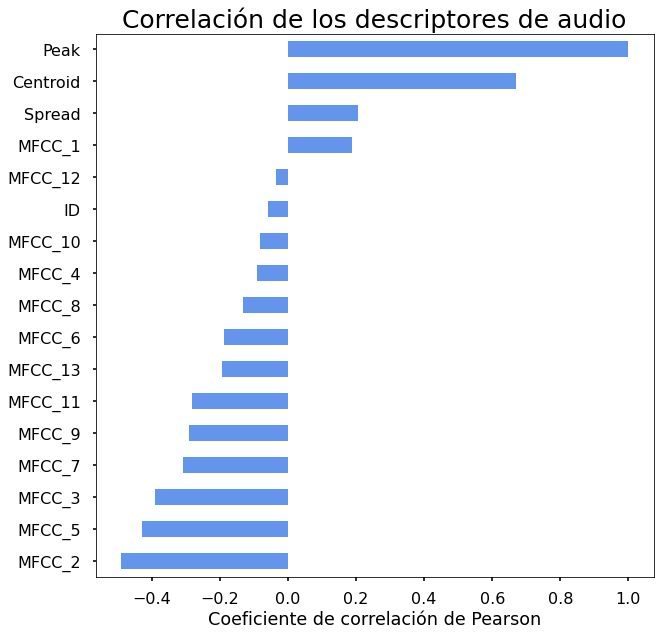

In [72]:
datos.corrwith(datos.Peak).sort_values().plot.barh(figsize=(10,10), color='cornflowerblue')
plt.xlabel('Coeficiente de correlación de Pearson')
plt.title('Correlación de los descriptores de audio', fontsize = 25);

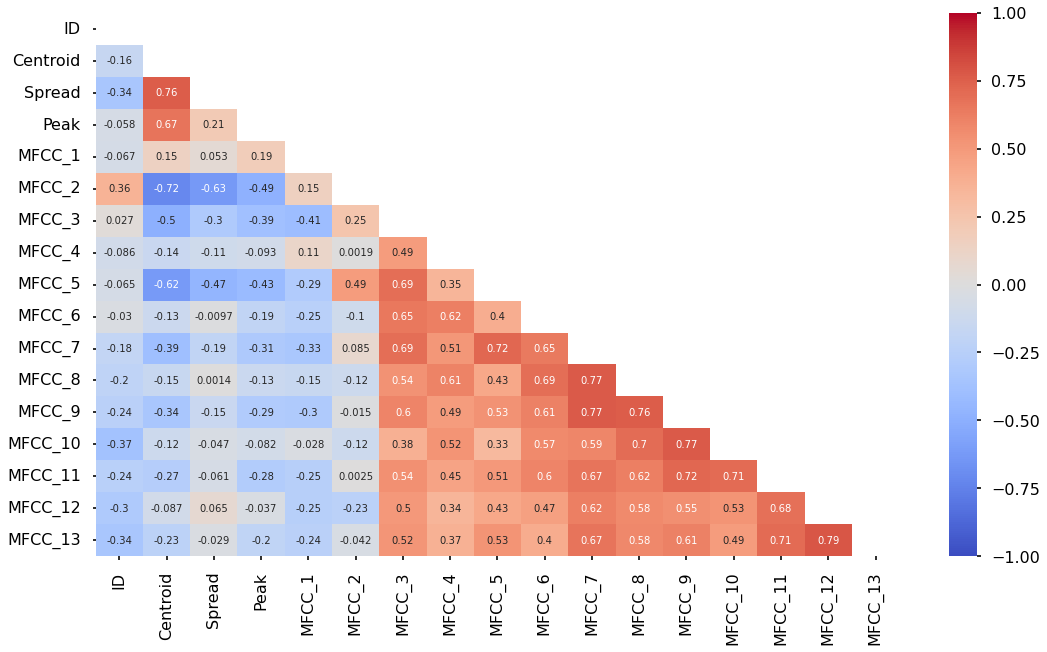

In [73]:
plt.figure(figsize=(18,10))
corr_df = datos.corr()
mask = np.triu(np.ones_like(corr_df))
sns.heatmap(datos.corr(),cmap='coolwarm',annot=True, annot_kws={'fontsize':10}, mask=mask, vmin=-1, vmax=1);

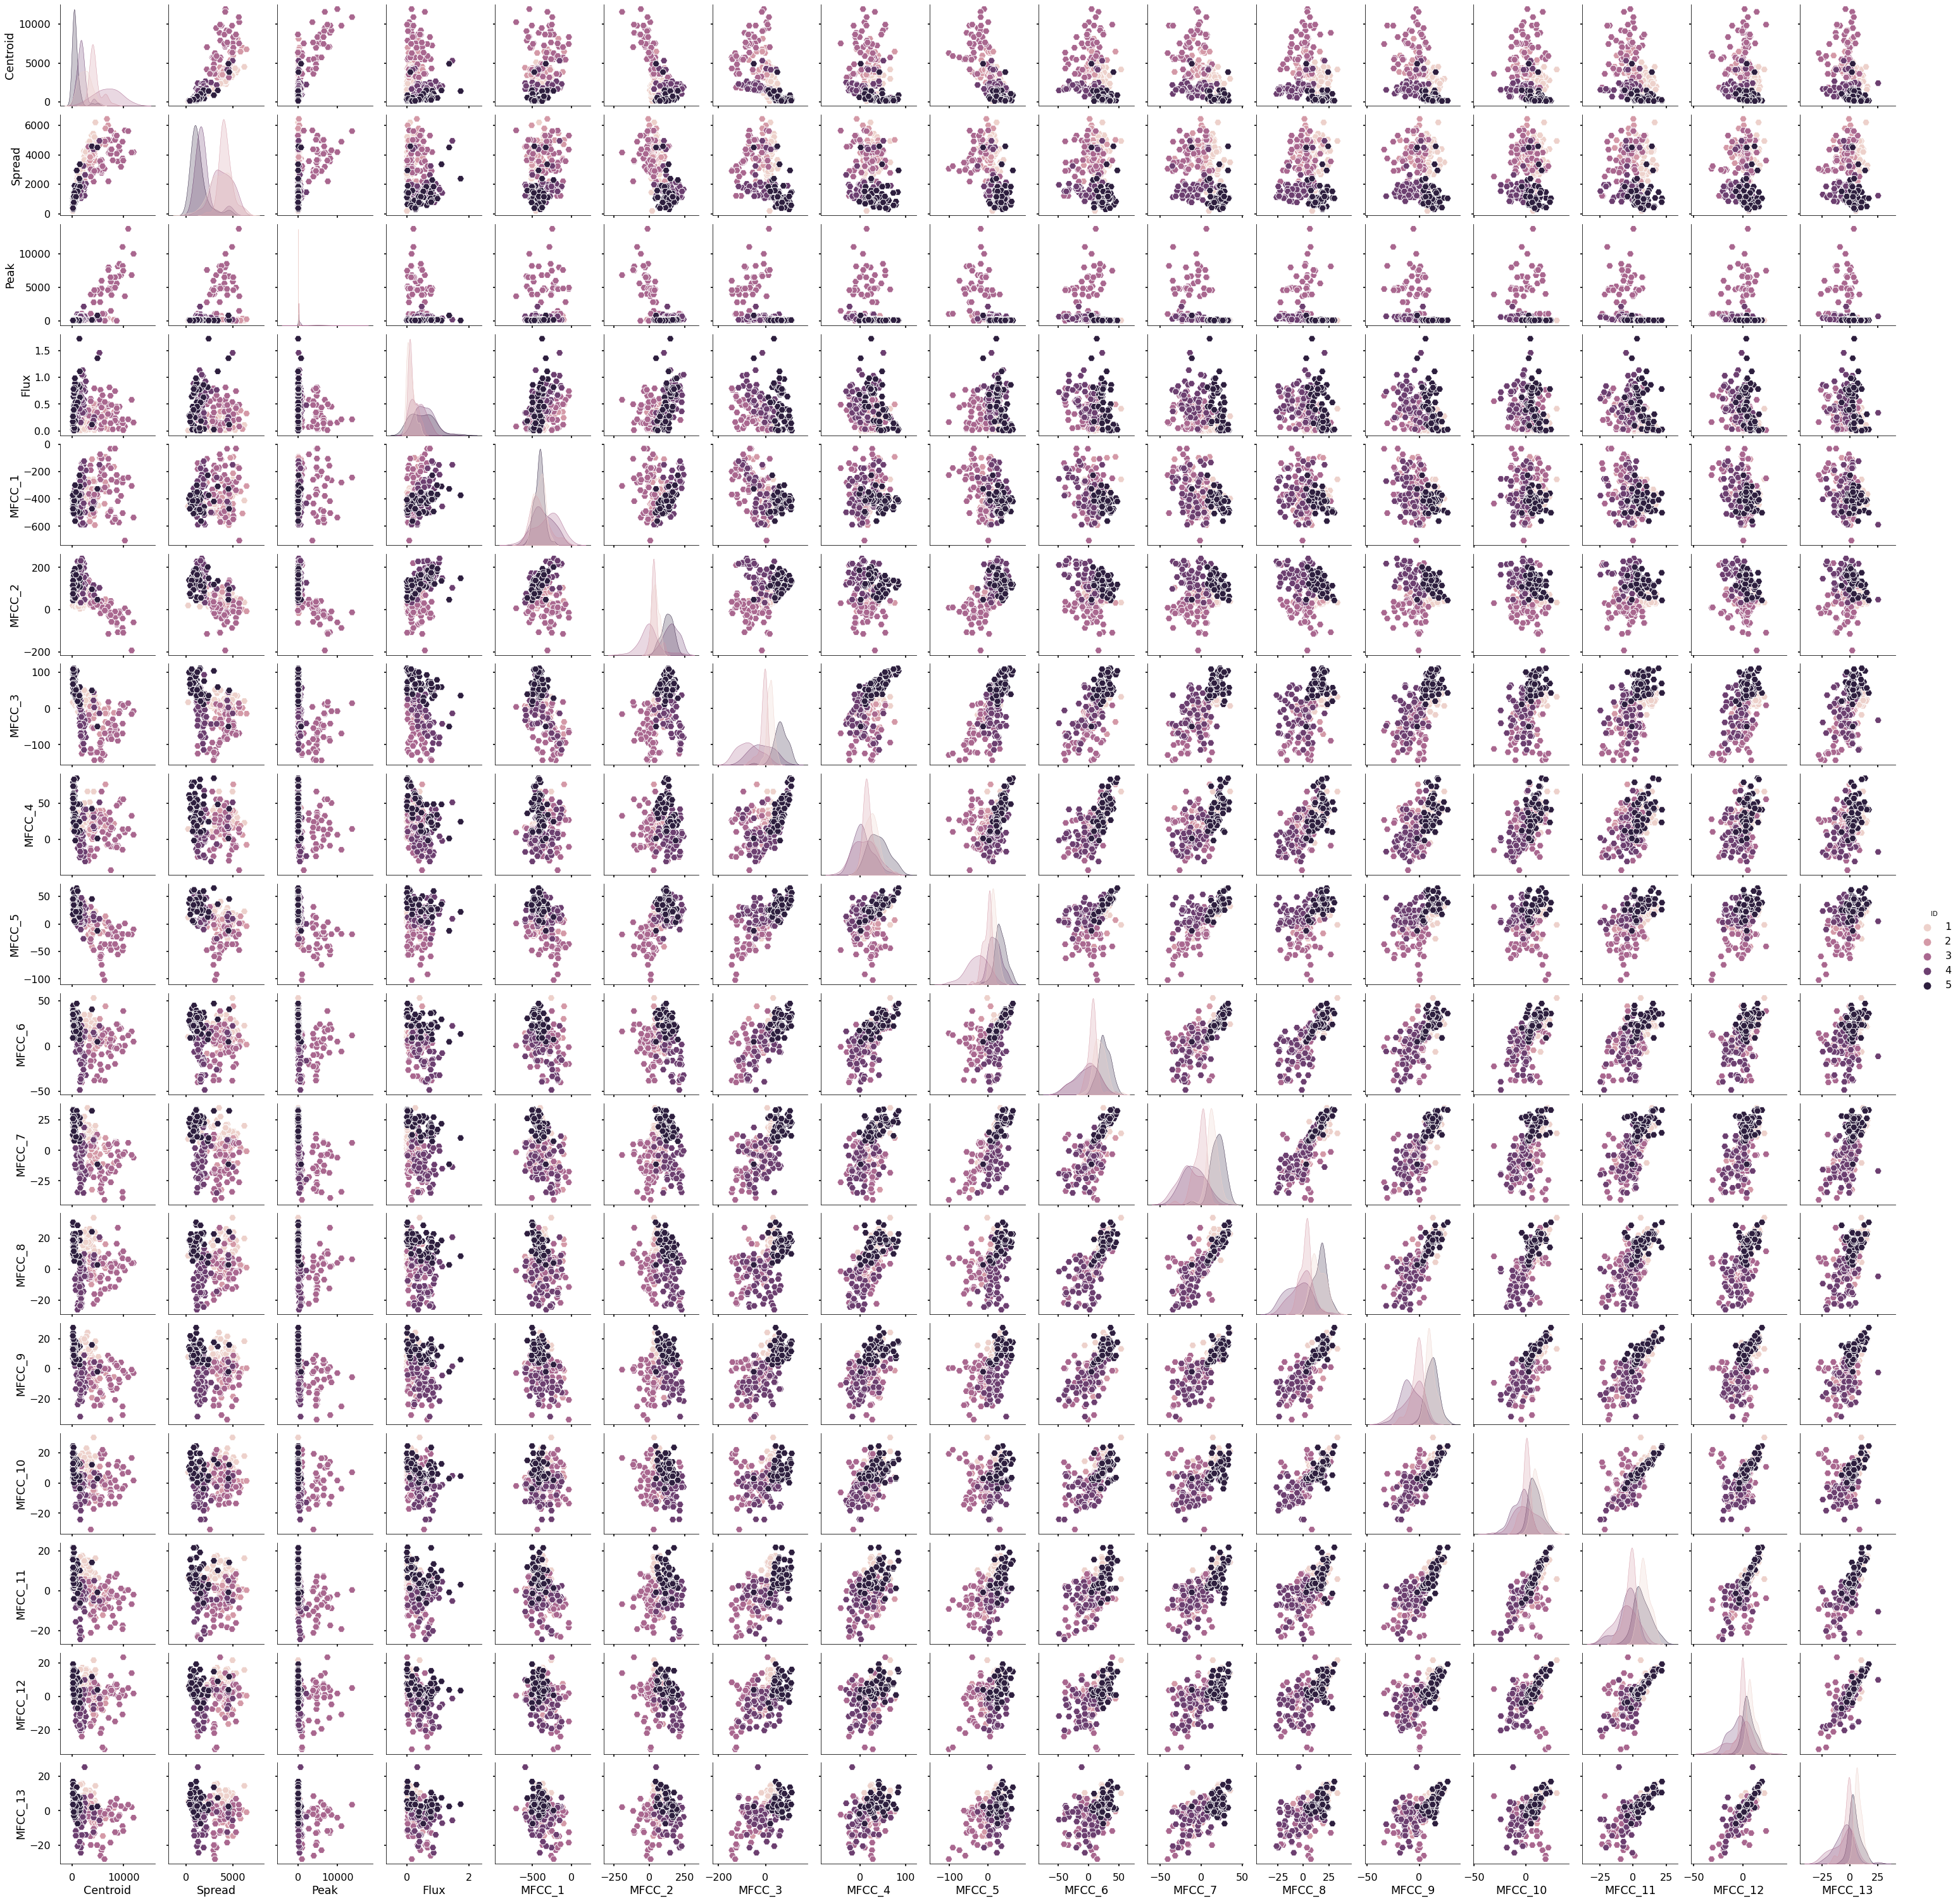

In [78]:
sns.pairplot(datos, hue='ID', markers='H');

### SEE SOME DATA

In [74]:
plt.style.use("seaborn-poster")

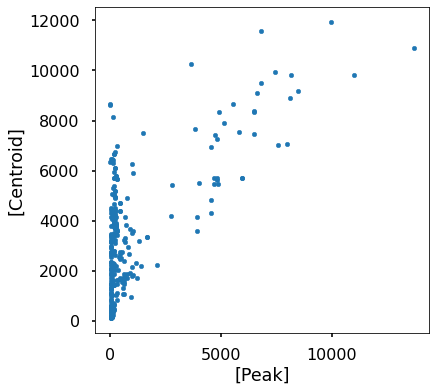

In [75]:
datos[['Peak', 'Centroid']].plot.scatter(x=['Peak'], y=['Centroid'], alpha=1, figsize=(6,6));

### DEFINE X NAMES FOR TRAINING

In [76]:
x_names = ['Centroid', 'Spread', 'Peak', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13']

### SPLIT TRAIN AND TEST DATA

In [77]:
x_train, x_test, y_train, y_test = train_test_split(datos[x_names], datos.ID, test_size=0.2, random_state=69)

In [78]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth':range(2,15)} #, 'criterion':['gini','entropy']} # a modo de diccionario los metaparemetros y valores
dt = DecisionTreeClassifier() # estimador el modelo
clf =  GridSearchCV(dt, param, cv=3) # pendiente explicar Cross-Validation
clf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 15)})

In [80]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result#[cv_result.rank_test_score==1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.003019      0.000356         0.001330        0.000102   
1        0.002533      0.000146         0.001229        0.000115   
2        0.002570      0.000075         0.001302        0.000122   
3        0.003447      0.001114         0.001279        0.000277   
4        0.002261      0.000124         0.001182        0.000235   
5        0.002096      0.000121         0.000935        0.000220   
6        0.002024      0.000152         0.000888        0.000101   
7        0.001871      0.000093         0.000672        0.000013   
8        0.001727      0.000100         0.000668        0.000043   
9        0.001732      0.000052         0.000665        0.000031   
10       0.001737      0.000173         0.000663        0.000035   
11       0.001599      0.000060         0.000604        0.000009   
12       0.001862      0.000187         0.000696        0.000066   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                2   {'max_depth': 2}             0.5000             0.4500   
1                3   {'max_depth': 3}             0.6625             0.6625   
2                4   {'max_depth': 4}             0.8125             0.8000   
3                5   {'max_depth': 5}             0.7625             0.8625   
4                6   {'max_depth': 6}             0.7875             0.8000   
5                7   {'max_depth': 7}             0.8125             0.8625   
6                8   {'max_depth': 8}             0.8000             0.8375   
7                9   {'max_depth': 9}             0.8000             0.8750   
8               10  {'max_depth': 10}             0.8375             0.8500   
9               11  {'max_depth': 11}             0.8250             0.8750   
10              12  {'max_depth': 12}             0.8125             0.8625   
11              13  {'max_depth': 13}             0.8000             0.8875   
12              14  {'max_depth': 14}             0.8375             0.8500   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  
0              0.4875         0.479167        0.021246               13  
1              0.7375         0.687500        0.035355               12  
2              0.8125         0.808333        0.005893               10  
3              0.8125         0.812500        0.040825                9  
4              0.8000         0.795833        0.005893               11  
5              0.8250         0.833333        0.021246                3  
6              0.8375         0.825000        0.017678                8  
7              0.8250         0.833333        0.031180                3  
8              0.8125         0.833333        0.015590                3  
9              0.8250         0.841667        0.023570                1  
10             0.8250         0.833333        0.021246                3  
11             0.8125         0.833333        0.038640                3  
12             0.8250         0.837500        0.010206                2

## TRAIN WITH DECISIONS TREE

In [81]:
model_tree = DecisionTreeClassifier(max_depth=11)
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11)

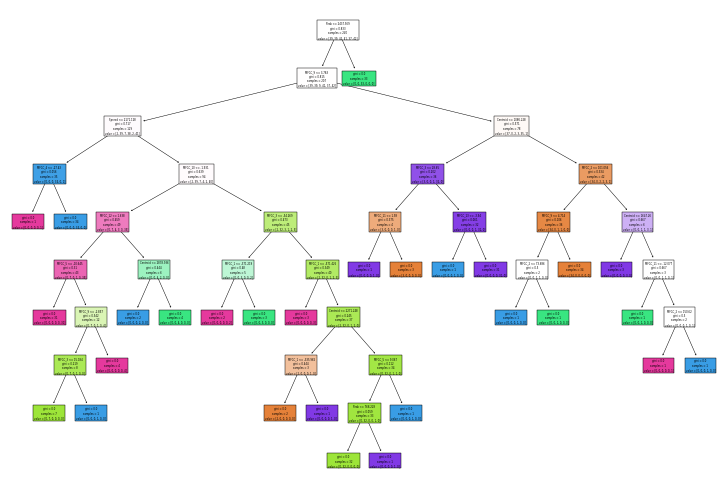

In [82]:
plt.figure()
plot_tree(model_tree, filled=True, feature_names= x_names)
plt.show()

### MAKE AND TEST PREDICTIONS

In [83]:
y_results_tree = model_tree.predict(x_test)
y_results_tree

array([6, 6, 1, 5, 5, 2, 2, 1, 3, 4, 5, 1, 6, 3, 1, 5, 5, 5, 6, 3, 1, 5,
       4, 4, 3, 4, 1, 2, 2, 4, 1, 4, 3, 1, 5, 3, 2, 6, 1, 3, 5, 6, 5, 4,
       3, 1, 1, 3, 6, 5, 3, 1, 4, 2, 5, 1, 4, 2, 4, 2])

In [84]:
kicksAcertados, numKicks = 0, 0
snaresAcertados, numSnares = 0, 0
hihatAcertados, numHihat = 0, 0
guitarAcertados, numGuitar = 0, 0
bassAcertados, numBass = 0, 0
voxAcertados, numVox = 0, 0

for num in range(len(y_results_tree)):
    if x_test.index[num] <= 49:
        if y_results_tree[num] == 1:
            kicksAcertados += 1
        numKicks += 1
            
    elif x_test.index[num] > 49 and x_test.index[num] <= 99:
        if y_results_tree[num] == 2:
            snaresAcertados += 1
        numSnares += 1
            
    elif x_test.index[num] > 99 and x_test.index[num] <= 149:
        if y_results_tree[num] == 3:
            hihatAcertados += 1
        numHihat += 1
        
    elif x_test.index[num] > 149 and x_test.index[num] <= 199:
        if y_results_tree[num] == 4:
            guitarAcertados += 1
        numGuitar += 1
        
    elif x_test.index[num] > 199 and x_test.index[num] <= 249:
        if y_results_tree[num] == 5:
            bassAcertados += 1
        numBass += 1
        
    elif x_test.index[num] > 249:
        if y_results_tree[num] == 6:
            voxAcertados += 1
        numVox += 1

print("De", numKicks, "kicks", kicksAcertados, "predijo como kick")
print("De", numSnares, "Snares", snaresAcertados, "predijo como snare")
print("De", numHihat, "Hihats", hihatAcertados, "predijo como hihat")
print("De", numGuitar, "Guitars", guitarAcertados, "predijo como guitar")
print("De", numBass, "Basses", bassAcertados, "predijo como Bass")
print("De", numVox, "Voxes", voxAcertados, "predijo como Vox")

De 11 kicks 11 predijo como kick
De 11 Snares 6 predijo como snare
De 8 Hihats 6 predijo como hihat
De 9 Guitars 8 predijo como guitar
De 13 Basses 12 predijo como Bass
De 8 Voxes 5 predijo como Vox


In [85]:
print(classification_report(y_test,y_results_tree))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       0.75      0.55      0.63        11
           3       0.60      0.75      0.67         8
           4       0.80      0.89      0.84         9
           5       1.00      0.92      0.96        13
           6       0.71      0.62      0.67         8

    accuracy                           0.80        60
   macro avg       0.79      0.79      0.78        60
weighted avg       0.80      0.80      0.80        60



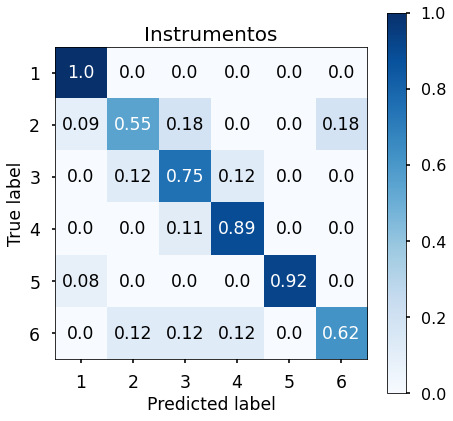

In [86]:
skplt.metrics.plot_confusion_matrix(y_test, y_results_tree, normalize = True, figsize=(7,7),text_fontsize='xx-large')
plt.title('Instrumentos', fontsize = 20);

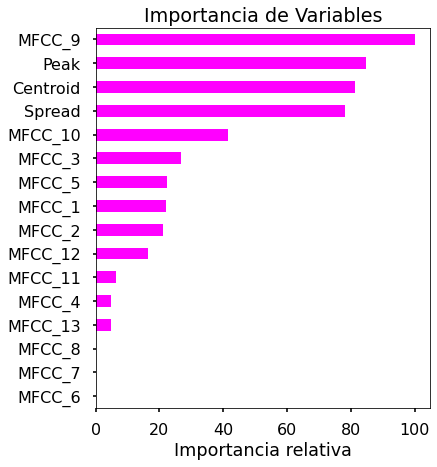

In [87]:
#DF de variables mas importantes
f_imp = pd.DataFrame(model_tree.feature_importances_,
                     index=x_names, columns=['imp'])
#calculo de importancia relativa
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)
#plot de importancia de variables
f_imp.sort_values('imp_rel',ascending=True).imp_rel.plot.barh(figsize=(6,7),
                                                              title='Importancia de Variables',color='magenta')
plt.xlabel('Importancia relativa');

## TRAIN WITH LOGICTIC REGRESSION

### STANDARIZE DATA

In [31]:
# estandarizado
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

### TRAIN MODEL

In [32]:
# Entrenamiento del modelo
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

### MAKE AND TEST PREDICTIONS

In [33]:
y_results_logictic = model.predict(x_test)

In [34]:
kicksAcertados, numKicks = 0, 0
snaresAcertados, numSnares = 0, 0
hihatAcertados, numHihat = 0, 0

for num in range(len(x_test)):
    if x_test.index[num] <= 49:
        if y_results_logictic[num] == 1:
            kicksAcertados += 1
        numKicks += 1
            
    elif x_test.index[num] > 49 and x_test.index[num] <= 99:
        if y_results_logictic[num] == 2:
            snaresAcertados += 1
        numSnares += 1
            
    elif x_test.index[num] > 99:
        if y_results_logictic[num] == 3:
            hihatAcertados += 1
        numHihat += 1

print("De", numKicks, "kicks", kicksAcertados, "predijo como kick")
print("De", numSnares, "Snares", snaresAcertados, "predijo como snare")
print("De", numHihat, "Hihat", hihatAcertados, "predijo como hihat")

De 10 kicks 10 predijo como kick
De 8 Snares 6 predijo como snare
De 12 Hihat 11 predijo como hihat


### PREDICTIONS PROBABILITIES

In [35]:
y_hat_proba = model.predict_proba(x_test)
y_hat_proba[:10]

array([[8.83571115e-01, 3.14857281e-02, 8.49431568e-02],
       [3.25486838e-03, 4.48359661e-01, 5.48385471e-01],
       [8.65498487e-01, 1.30862335e-01, 3.63917846e-03],
       [3.11317693e-04, 4.43570804e-01, 5.56117878e-01],
       [8.00558046e-01, 1.97999867e-01, 1.44208779e-03],
       [7.29646507e-01, 2.68116533e-01, 2.23695990e-03],
       [4.33167393e-01, 5.48074289e-01, 1.87583178e-02],
       [1.79842631e-02, 5.94903403e-02, 9.22525397e-01],
       [8.74253789e-02, 1.30310583e-02, 8.99543563e-01],
       [7.67537848e-01, 2.30018981e-01, 2.44317109e-03]])

In [36]:
print(classification_report(y_test,y_results_logictic))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      0.75      0.80         8
           3       0.85      0.92      0.88        12

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



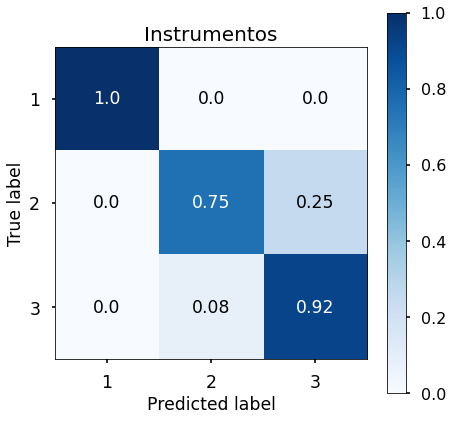

In [37]:
skplt.metrics.plot_confusion_matrix(y_test, y_results_logictic, normalize = True, figsize=(7,7),text_fontsize='xx-large')
plt.title('Instrumentos', fontsize = 20);

In [90]:
#print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test, y_hat, multi_class='ovr'))